In [1]:
# Import packages
from __future__ import division, print_function # Imports from __future__ since we're running Python 2
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from subprocess import call

%run '/home/mark/Desktop/Plastic-Parallel-Programming/data_analysis/year 2/utilities.ipynb'

Program parameters:

In [2]:
machine    = "spa"
kernel1    = "cpu"
size1      = "small"
kernel2    = "vm"
size2      = "small"
kernel3    = "cpu"
size3      = "large"

folder = "1"

nc1 = 8
nc2 = 12
nc3 = 12

In [3]:
if machine == "spa":
    number_of_tests = 729
    num_workers_max = 12
    num_cores_max   = 12

elif machine == "XXXII":
    number_of_tests = 0
    num_workers_max = 0
    num_cores_max   = 0
    
folder_path1   = "results/" + machine + "/" + folder + "/exp_1_1/"
folder_path2   = "results/" + machine + "/" + folder + "/exp_1_2/"
folder_path3   = "results/" + machine + "/" + folder + "/exp_1_3/"

graph_path     = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".png"
# graph_folder   = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + "/"
# graph_aminated = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".gif"
# text_path      = "graphs/" + machine + "/otwc_" + kernel1 + "_" + size1 + "_and_" + kernel2 + "_" + size2 + ".txt"

# if not os.path.exists(graph_folder):
#     os.makedirs(graph_folder)

Set files to read

In [4]:
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")

Import the dataset

In [5]:
data1 = []
data2 = []
data3 = []
        
fetch_data(folder_path1, file_names, data1, ["Runtime"])
fetch_data(folder_path2, file_names, data2, ["Runtime"])
fetch_data(folder_path3, file_names, data3, ["Runtime"])
        
dataset = []
raw_dataset = []

num_workers_min = 4
num_workers_step = 4
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

num_cores_min = 4
num_cores_step = 4
num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
ncv_len = len(num_cores_values)
num_cores = num_cores_values[0]

for i in range(len(data1)):
    num_workers3 = num_workers_values[i % nwv_len]
    num_cores3   = num_cores_values[(i // nwv_len) % ncv_len]
    num_workers2 = num_workers_values[((i // nwv_len) // ncv_len) % nwv_len]
    num_cores2   = num_cores_values[(((i // nwv_len) // ncv_len) // nwv_len) % ncv_len]
    num_workers1 = num_workers_values[((((i // nwv_len) // ncv_len) // nwv_len) // ncv_len) % nwv_len]
    num_cores1   = num_cores_values[(((((i // nwv_len) // ncv_len) // nwv_len) // ncv_len) // nwv_len) % ncv_len]
    
    dataset.append([num_cores1, num_workers1, num_cores2, num_workers2, num_cores3, num_workers3, np.mean([x + y + z for x, y, z in zip(data1[i].values, data2[i].values, data3[i].values)])])

    for j in range(1, len(data1[i])):
        raw_dataset.append([num_cores1, num_workers1, num_cores2, num_workers2, num_cores3, num_workers3, data1[i].values[j][0] + data2[i].values[j][0] + data3[i].values[j][0]])

dataset = pd.DataFrame(dataset)
dataset.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Num Cores 3", "Num Workers 3", "Total Runtime"]

raw_dataset = pd.DataFrame(raw_dataset)
raw_dataset.columns = ["Num Cores 1", "Num Workers 1", "Num Cores 2", "Num Workers 2", "Num Cores 3", "Num Workers 3", "Total Runtime"]

In [6]:
min_runtime = min(dataset["Total Runtime"])

nc1 = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]["Num Cores 1"].item()
nc2 = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]["Num Cores 2"].item()
nc3 = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]["Num Cores 3"].item()

nw1 = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]["Num Workers 1"].item()
nw2 = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]["Num Workers 2"].item()
nw3 = dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]["Num Workers 3"].item()

dataset[dataset["Total Runtime"] == min(dataset["Total Runtime"])]

,Num Cores 1,Num Workers 1,Num Cores 2,Num Workers 2,Num Cores 3,Num Workers 3,Total Runtime
314,8,4,12,8,12,12,354.841584


In [7]:
if machine == "spa":
    number_of_tests = 144
    num_workers_max = 24
    num_cores_max   = 24

elif machine == "XXXII":
    number_of_tests = 576
    num_workers_max = 48
    num_cores_max   = 48
    

    
file_names = []

for i in range(1, number_of_tests + 1): 
    file_names.append("test" + str(i) + "/output")
    
data1 = []
data2 = []
data3 = []
        
fetch_data("../optimal_threads/results/" + machine + "/optimal_threads_" + kernel1 + "_" + size1 + "/", file_names, data1, ["Runtime"])
fetch_data("../optimal_threads/results/" + machine + "/optimal_threads_" + kernel2 + "_" + size2 + "/", file_names, data2, ["Runtime"])
fetch_data("../optimal_threads/results/" + machine + "/optimal_threads_" + kernel3 + "_" + size3 + "/", file_names, data3, ["Runtime"])



dataset1 = []
dataset2 = []
dataset3 = []

num_workers_min = 2
num_workers_step = 2
num_workers_values = range(num_workers_min, num_workers_max + num_workers_step, num_workers_step)
nwv_len = len(num_workers_values)
num_workers = num_workers_values[0]

num_cores_min = 2
num_cores_step = 2
num_cores_values = range(num_cores_min, num_cores_max + num_cores_step, num_cores_step)
ncv_len = len(num_cores_values)
num_cores = num_cores_values[0]

for i in range(len(data1)):
    num_workers = num_workers_values[i % nwv_len]
    num_cores = num_cores_values[(i // nwv_len) % ncv_len]
    
    if (num_cores % 4 == 0) & (num_workers % 4 == 0) & (num_cores <= 12) & (num_workers <= 12):
        dataset1.append([num_cores, num_workers, data1[i][1:].mean()[0]])
    
for i in range(len(data2)):
    num_workers = num_workers_values[i % nwv_len]
    num_cores = num_cores_values[(i // nwv_len) % ncv_len]
    
    if (num_cores % 4 == 0) & (num_workers % 4 == 0) & (num_cores <= 12) & (num_workers <= 12):
        dataset2.append([num_cores, num_workers, data2[i][1:].mean()[0]])
        
for i in range(len(data3)):
    num_workers = num_workers_values[i % nwv_len]
    num_cores = num_cores_values[(i // nwv_len) % ncv_len]
    
    if (num_cores % 4 == 0) & (num_workers % 4 == 0) & (num_cores <= 12) & (num_workers <= 12):
        dataset3.append([num_cores, num_workers, data3[i][1:].mean()[0]])

dataset1 = pd.DataFrame(dataset1)
dataset1.columns = ["Num Cores", "Num Workers", "Time"]

dataset2 = pd.DataFrame(dataset2)
dataset2.columns = ["Num Cores", "Num Workers", "Time"]

dataset3 = pd.DataFrame(dataset2)
dataset3.columns = ["Num Cores", "Num Workers", "Time"]

In [8]:
independent_min_runtime1 = min(dataset1["Time"])
independent_min_runtime2 = min(dataset2["Time"])
independent_min_runtime3 = min(dataset2["Time"])

inw1 = dataset1[dataset1["Time"] == independent_min_runtime1]["Num Workers"].item()
inc1 = dataset1[dataset1["Time"] == independent_min_runtime1]["Num Cores"].item()

inw2 = dataset2[dataset2["Time"] == independent_min_runtime2]["Num Workers"].item()
inc2 = dataset2[dataset2["Time"] == independent_min_runtime2]["Num Cores"].item()

inw3 = dataset3[dataset3["Time"] == independent_min_runtime3]["Num Workers"].item()
inc3 = dataset3[dataset3["Time"] == independent_min_runtime3]["Num Cores"].item()

imin = dataset.loc[(dataset["Num Cores 1"] == inc1) & (dataset["Num Cores 2"] == inc2) & (dataset["Num Cores 3"] == inc3) & (dataset["Num Workers 1"] == inw1) & (dataset["Num Workers 2"] == inw2) & (dataset["Num Workers 3"] == inw3)]

imin_value = imin["Total Runtime"].item()

imin

,Num Cores 1,Num Workers 1,Num Cores 2,Num Workers 2,Num Cores 3,Num Workers 3,Total Runtime
70,4,4,12,8,12,8,367.653465


IOError: [Errno 2] No such file or directory: 'graphs/spa/otwc_cpu_small_and_vm_small.png'

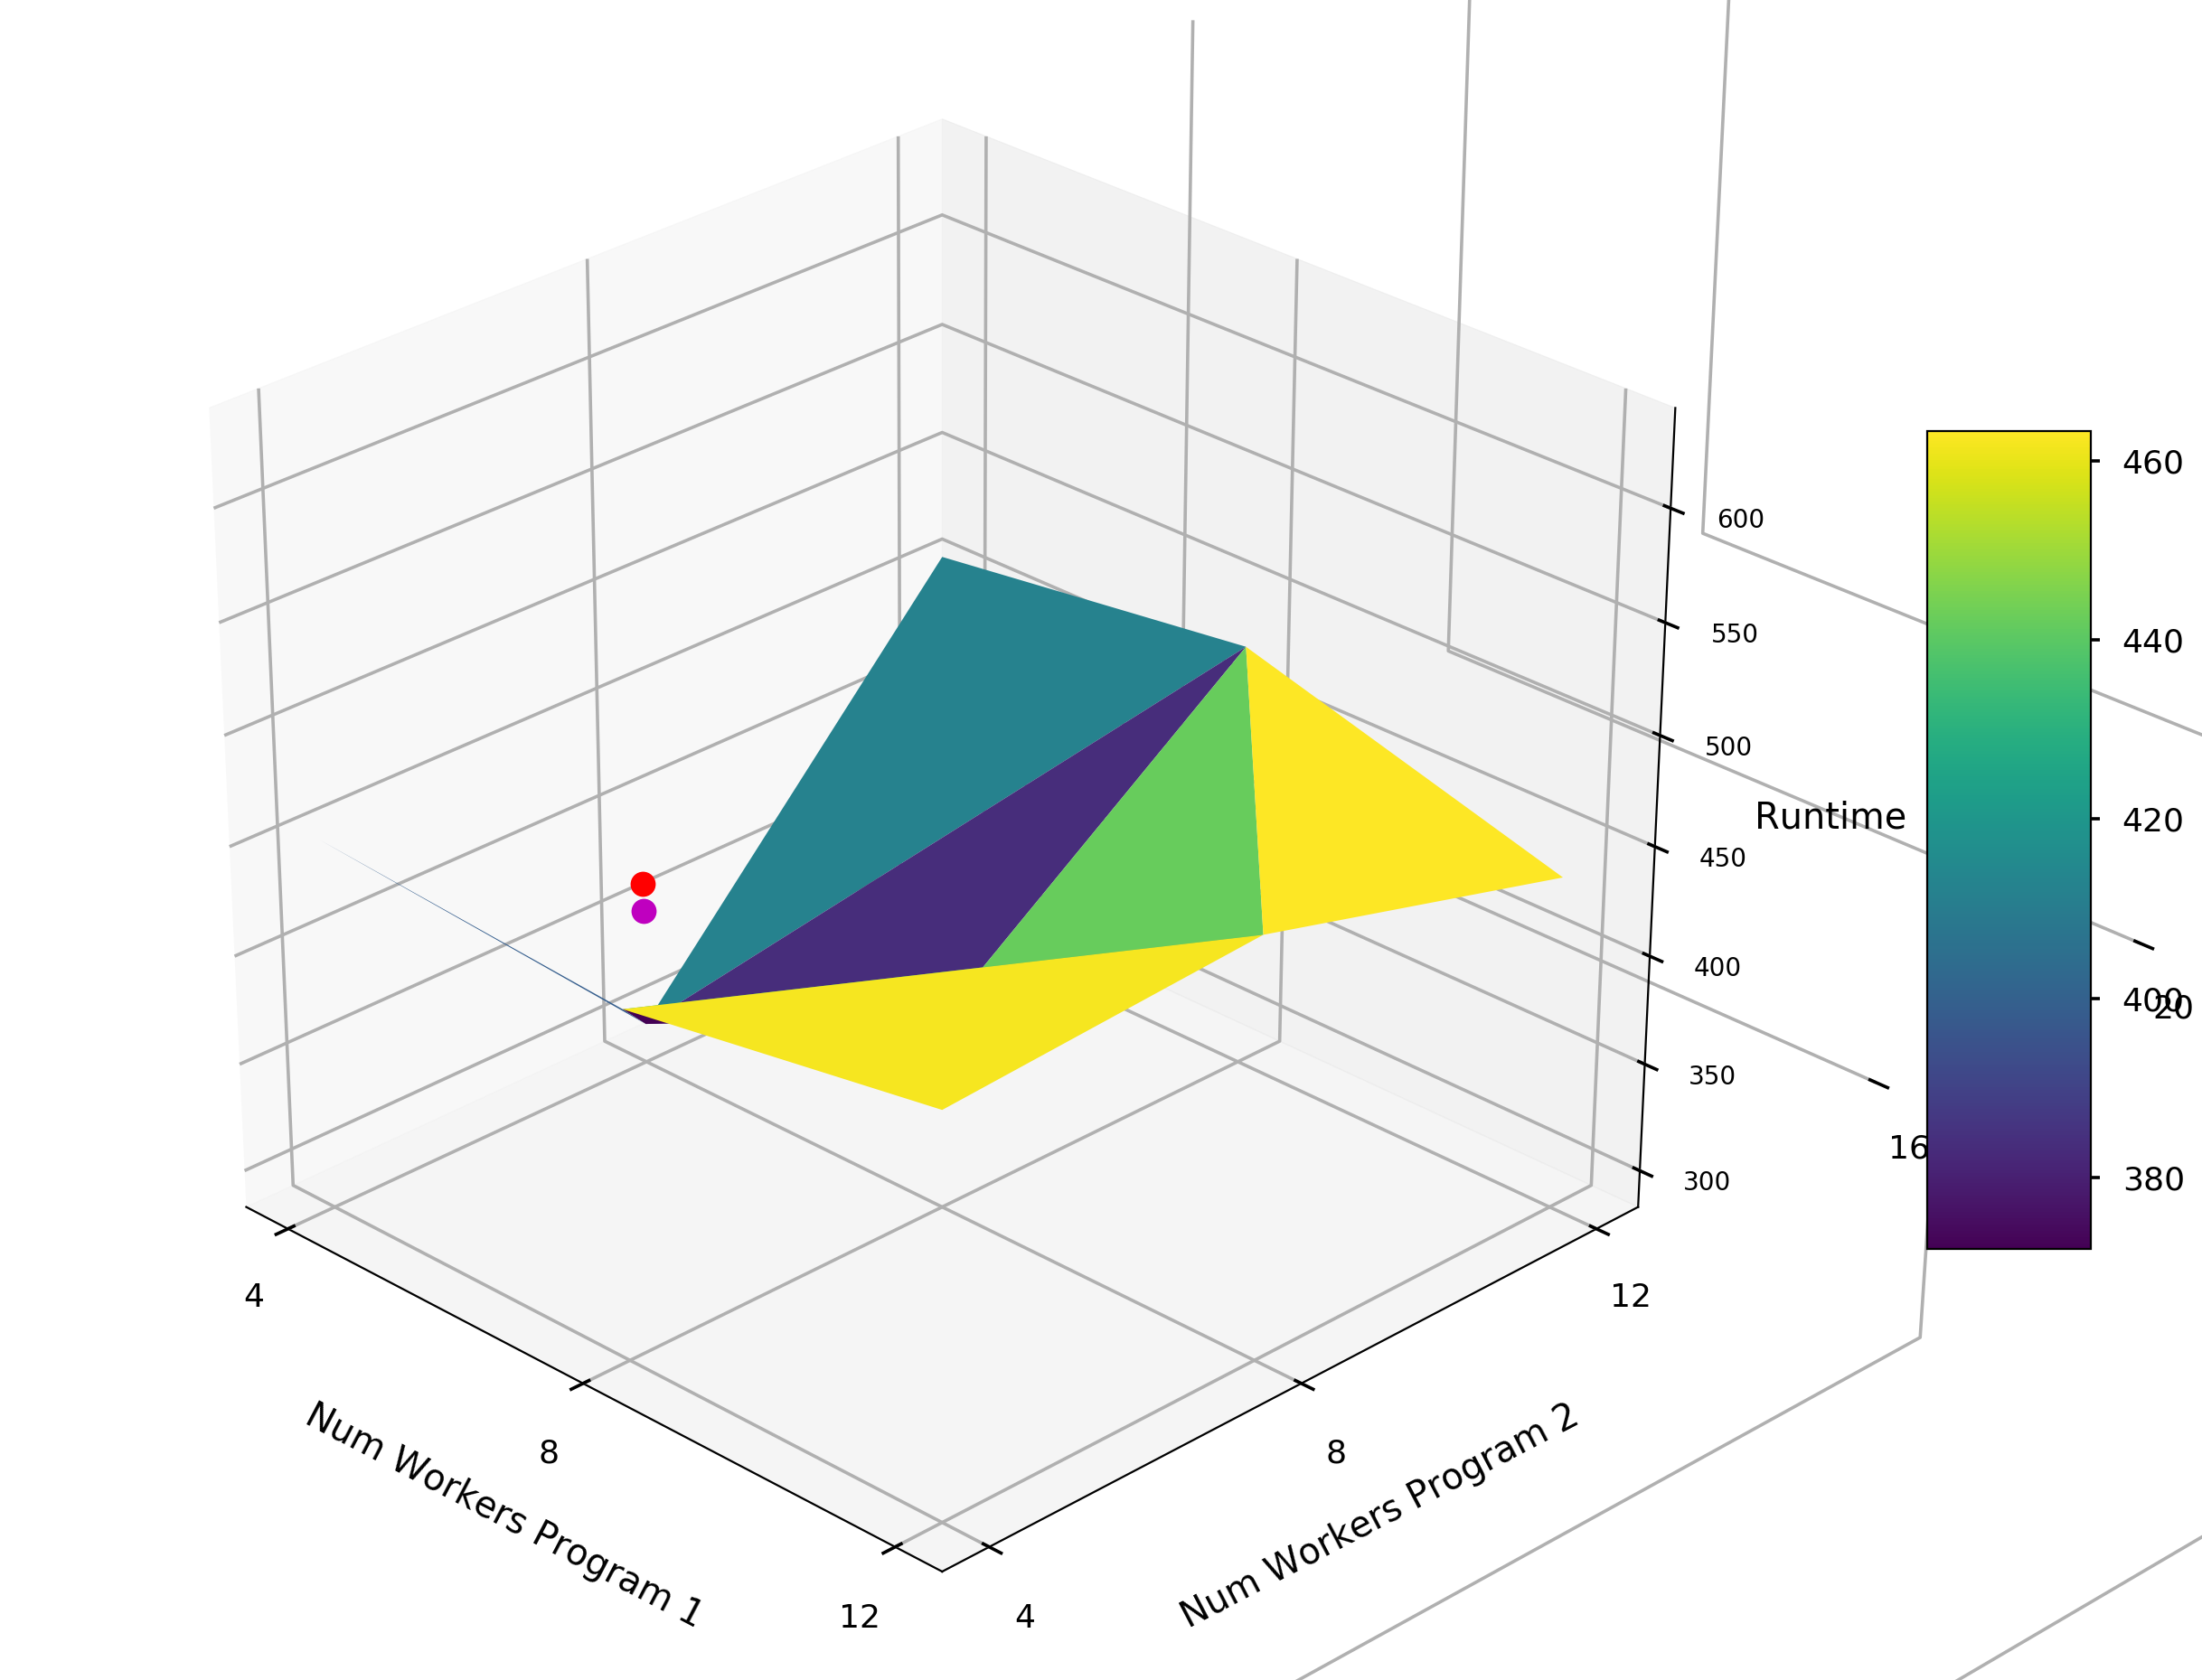

In [9]:
reduced_dataset = raw_dataset[(raw_dataset["Num Cores 1"] == nc1) & (raw_dataset["Num Cores 2"] == nc2) & (raw_dataset["Num Cores 3"] == nc3)]

sns.set_context("talk")

# Plot figure
fig = plt.figure(num=None, figsize=(16, 12), dpi=200, facecolor='w', edgecolor='k')
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(reduced_dataset[(reduced_dataset["Num Workers 3"] == 4)]["Num Workers 1"], reduced_dataset[(reduced_dataset["Num Workers 3"] == 4)]["Num Workers 2"], reduced_dataset[(reduced_dataset["Num Workers 3"] == 4)]["Total Runtime"], cmap=plt.cm.viridis, linewidth=0.01)
 
# Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=5)
 
# Rotate
ax.view_init(30, 315)

# Plot minimum point
ax.plot([nw1], [nw2], [min_runtime], markerfacecolor='m', markeredgecolor='m', marker='o', markersize=10, alpha=1)

# Plot independent point
ax.plot([inw1], [inw2], [imin_value], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=10, alpha=1)

ax.set_xlabel('\nNum Workers Program 1', linespacing=4)
ax.set_ylabel('\nNum Workers Program 2', linespacing=4)
ax.set_xticks(range(4, 25, 4))
ax.set_yticks(range(4, 25, 4))
# ax.yaxis._axinfo['label']['space_factor'] = 3.0
# set z ticks and labels
# ax.set_zticks([-2, 0, 2])
# change fontsize
for t in ax.zaxis.get_major_ticks(): t.label.set_fontsize(10)
    
# disable auto rotation
ax.zaxis.set_rotate_label(False) 

# ax.set_zlabel('Runtime             ', rotation = 0)
# ax.set_zlabel('             Runtime', rotation = 0)
# ax.set_zlabel('             Runtime', rotation = 0)
# ax.set_zlabel('Runtime             ', rotation = 0)
ax.set_zlabel('             Runtime', rotation = 0)

plt.savefig(graph_path)

In [ ]:
# f = open(text_path, "w")
# f.write("Total independent settings runtime: " + str(imin_value) + '\n')
# f.write("Total contention-aware runtime:     " + str(min_runtime) + '\n')
# f.write("Percentage difference:              " + str(imin_value / min_runtime * 100) + '%')
# f.close()

# print("Percentage difference: " + str(imin_value / min_runtime * 100) + '%')

data = raw_dataset[(raw_dataset["Num Cores 1"] == nc1) & (raw_dataset["Num Cores 2"] == nc2) & (raw_dataset["Num Cores 3"] == nc3) & (raw_dataset["Num Workers 1"] == nw1) & (raw_dataset["Num Workers 2"] == nw2) & (raw_dataset["Num Workers 3"] == nw3)]

data2 = raw_dataset[(raw_dataset["Num Cores 1"] == inc1) & (raw_dataset["Num Cores 2"] == inc2) & (raw_dataset["Num Cores 3"] == inc3) & (raw_dataset["Num Workers 1"] == inw1) & (raw_dataset["Num Workers 2"] == inw2) & (raw_dataset["Num Workers 3"] == inw3)]

print("Independently profiled runtime: " + str(int(round(imin_value))))

print("95% Confidence Interval: " + str(mean_confidence_interval(data2["Total Runtime"].values)))

print("Optimal runtime: " + str(int(round(min_runtime))))

print("95% Confidence Interval: " + str(mean_confidence_interval(data["Total Runtime"].values)))

print("Speedup: " + str(imin_value / min_runtime ))

print("NC1: ", nc1, " NC2: ", nc2)